#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 09
**CH09A Estimating gender and age differences in earnings**

using the cps-earnings dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.core.display import HTML
from stargazer.stargazer import Stargazer
import statsmodels.nonparametric.kernel_regression as loess

warnings.filterwarnings("ignore")


In [3]:
data_all = pd.read_csv("/workspaces/codespaces-jupyter/data/morg-2014-emp.csv")

### SELECT OCCUPATION

keep only two occupation types: Market research analysts and marketing specialists and Computer and Mathematical Occupations

In [6]:
data_all.loc[data_all["occ2012"] == 735, "sample"] = 1
data_all.loc[
    ((data_all["occ2012"] >= 1005) & (data_all["occ2012"] <= 1240)), "sample"
] = 2
data_all.loc[data_all["sample"].isna(), "sample"] = 0


In [5]:
data["earnyear"] = data["earnwke"]*52
data

NameError: name 'data' is not defined

In [108]:
data["earnings"]

KeyError: 'earnings'

In [7]:
data_all

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,sample
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work,0.0
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent,0.0
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work,0.0
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work,0.0
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149311,317051,896679860459501,December,WY,346.2296,692.30,40,39,1,NaN,...,0,"Native, Born In US",8,Office supplies and stationery stores (45321),4760,"Private, For Profit",No,No,Employed-At Work,0.0
149312,317052,907086820569600,December,WY,294.9800,1984.61,40,44,1,NaN,...,3,"Native, Born In US",8,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work,0.0
149313,317053,907086820569600,December,WY,324.1761,2884.61,55,43,1,NaN,...,3,"Native, Born In US",8,Nursing care facilities (6231),10,"Private, For Profit",No,No,Employed-At Work,0.0
149314,317055,950868097156649,December,WY,321.6982,1153.84,40,42,1,NaN,...,0,"Native, Born In US",8,Hospitals (622),5820,"Private, Nonprofit",No,No,Employed-At Work,0.0


In [8]:
data_all = data_all.loc[
    (data_all["sample"] == 1) | (data_all["sample"] == 2), :
].reset_index(drop=True)


In [9]:
data_all["sample"].value_counts()


sample
2.0    4740
1.0     281
Name: count, dtype: int64

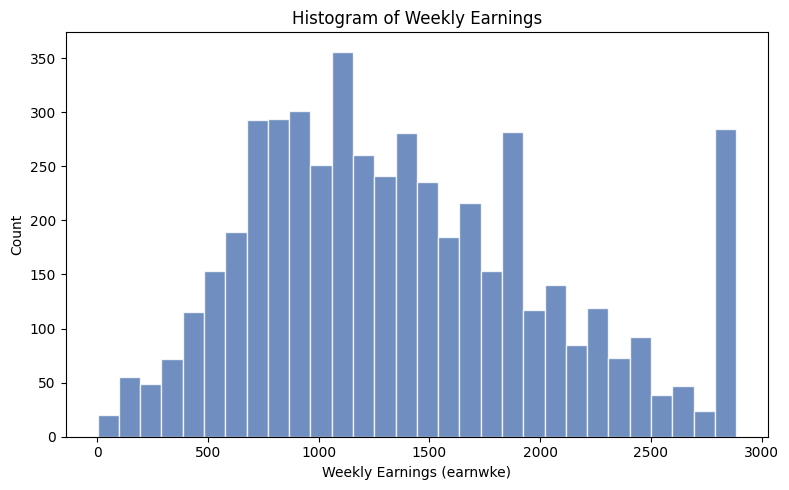

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(data_all["earnwke"], bins=30, color="#4C72B0", edgecolor="white", alpha=0.8)
plt.xlabel("Weekly Earnings (earnwke)")
plt.ylabel("Count")
plt.title("Histogram of Weekly Earnings")
plt.tight_layout()
plt.show()

In [11]:
data_all["female"] = (data_all["sex"] == 2)
data_all["w"] = data_all["earnwke"] / data_all["uhours"]
data_all["lnw"] = np.log(data_all["w"])
data_all["agesq"] = np.power(data_all["age"], 2)

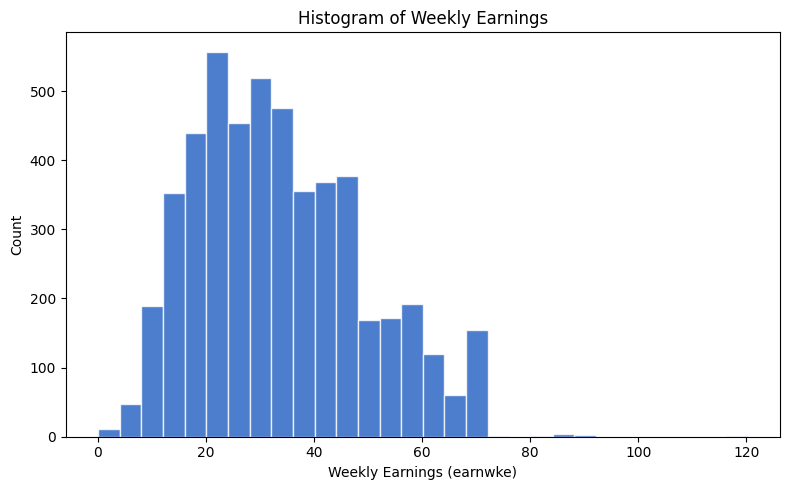

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(data_all["w"], bins=30, color="#205EC1", edgecolor="white", alpha=0.8)
plt.xlabel("Weekly Earnings (earnwke)")
plt.ylabel("Count")
plt.title("Histogram of Weekly Earnings")
plt.tight_layout()
plt.show()

In [13]:
i = 1
data = data_all.loc[data_all["sample"] == i, :].reset_index(drop=True)
data.to_csv("earnings_inference.csv", index=False)

### DISTRIBUTION OF EARNINGS

In [14]:
data.loc[:, ["earnwke", "uhours", "w"]].describe()

,earnwke,uhours,w
count,281.000000,281.000000,281.000000
mean,1206.186940,40.153025,29.061656
std,709.545222,10.325838,14.712495
min,40.000000,5.000000,7.250000
25%,700.000000,40.000000,17.788250
50%,1096.150000,40.000000,25.950000
75%,1538.000000,40.000000,37.019000
max,2884.610000,80.000000,84.600000


In [15]:
data.loc[data["w"] >= 1, ["earnwke", "uhours", "w"]].describe()

,earnwke,uhours,w
count,281.000000,281.000000,281.000000
mean,1206.186940,40.153025,29.061656
std,709.545222,10.325838,14.712495
min,40.000000,5.000000,7.250000
25%,700.000000,40.000000,17.788250
50%,1096.150000,40.000000,25.950000
75%,1538.000000,40.000000,37.019000
max,2884.610000,80.000000,84.600000


In [16]:
data["female"].value_counts()

female
True     172
False    109
Name: count, dtype: int64

In [17]:
data.groupby(["occ2012", "female"]).size()

occ2012  female
735      False     109
         True      172
dtype: int64

### Linear regressions

In [18]:
reg1 = smf.ols(formula="lnw~female", data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.390
Date:                Fri, 04 Jul 2025   Prob (F-statistic):             0.0666
Time:                        22:53:32   Log-Likelihood:                -203.81
No. Observations:                 281   AIC:                             411.6
Df Residuals:                     279   BIC:                             418.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3149      0.048     69.004      0.000       3.220       3.409
female[T.True]    -0.1131      0.061     -1.841      0.067      -0.234       0.008
==============================================================================
Omnibus:                        5.253   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                3.371
Skew:                          -0.070   Prob(JB):                        0.185
Kurtosis:                       2.482   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
reg2 = smf.ols(formula="lnw~female", data=data).fit(cov_type="HC1") # HC1 refers to a type of robust (heteroskedasticity-consistent) standard error used in regression analysis.
reg2.summary() #gives you robust standard errors, making your inference (like confidence intervals and p-values) more reliable when heteroskedasticity may be present.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.347
Date:                Fri, 04 Jul 2025   Prob (F-statistic):             0.0684
Time:                        22:53:32   Log-Likelihood:                -203.81
No. Observations:                 281   AIC:                             411.6
Df Residuals:                     279   BIC:                             418.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3149      0.049     67.810      0.000       3.219       3.411
female[T.True]    -0.1131      0.062     -1.829      0.067      -0.234       0.008
==============================================================================
Omnibus:                        5.253   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                3.371
Skew:                          -0.070   Prob(JB):                        0.185
Kurtosis:                       2.482   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

# Bootstrap

In [20]:
bootstrap_samples = np.random.choice(
    data["lnw"].dropna(),
    size=(1000, len(data["lnw"].dropna())),
    replace=True
)

In [21]:
bootstrap_means = bootstrap_samples.mean(axis=0)
print("Bootstrap mean:", bootstrap_means.mean())
print("Standard error of mean:", (bootstrap_means.std()))


Bootstrap mean: 3.2445029445405793
Standard error of mean: 0.016029523733026952


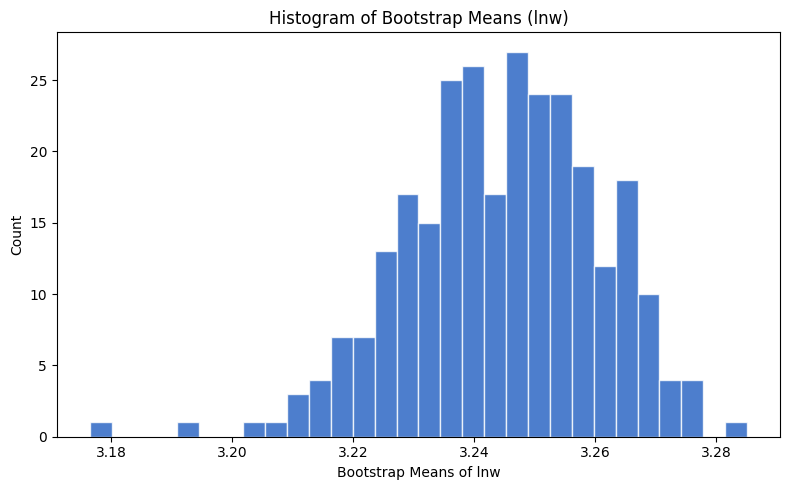

In [22]:
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_means, bins=30, color="#205EC1", edgecolor="white", alpha=0.8)
plt.xlabel("Bootstrap Means of lnw")
plt.ylabel("Count")
plt.title("Histogram of Bootstrap Means (lnw)")
plt.tight_layout()
plt.show()

### Table 9.1 Wage and gender gap baseline regression

In [23]:
stargazer = Stargazer([reg1, reg2])
stargazer.covariate_order(["female[T.True]", "Intercept"])
stargazer.rename_covariates({"female[T.True]": "female", "Intercept": "Constant"})
stargazer

In [24]:
reg3 = smf.ols(formula="lnw~age", data=data).fit(cov_type="HC1")
reg3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     26.36
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           5.31e-07
Time:                        22:53:32   Log-Likelihood:                -191.01
No. Observations:                 281   AIC:                             386.0
Df Residuals:                     279   BIC:                             393.3
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7317      0.101     27.006      0.000       2.533       2.930
age            0.0135      0.003      5.135      0.000       0.008       0.019
==============================================================================
Omnibus:                        1.782   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.708
Skew:                          -0.109   Prob(JB):                        0.426
Kurtosis:                       2.687   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [25]:
reg4 = smf.ols(formula="lnw~age+agesq", data=data).fit(cov_type="HC1")
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     27.47
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           1.29e-11
Time:                        22:53:32   Log-Likelihood:                -179.58
No. Observations:                 281   AIC:                             365.2
Df Residuals:                     278   BIC:                             376.1
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1935      0.341      3.499      0.000       0.525       1.862
age            0.0962      0.018      5.360      0.000       0.061       0.131
agesq         -0.0010      0.000     -4.608      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.304   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.859   Jarque-Bera (JB):                0.353
Skew:                          -0.078   Prob(JB):                        0.838
Kurtosis:                       2.924   Cond. No.                     2.22e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Piecewise linear spline variables at knots 30 and 40
data['age_spline_<30'] = data['age'].clip(upper=30)
data['age_spline_30_40'] = (data['age'] - 30).clip(lower=0, upper=10)
data['age_spline_>40'] = (data['age'] - 40).clip(lower=0)


In [27]:
reg5 = smf.ols(formula="lnw~age_spline_30_40", data=data).fit(cov_type="HC1")
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     34.90
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           1.01e-08
Time:                        22:53:32   Log-Likelihood:                -188.89
No. Observations:                 281   AIC:                             381.8
Df Residuals:                     279   BIC:                             389.0
Df Model:                           1                                         
Covariance Type:                  HC1                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0462      0.042     72.623      0.000       2.964       3.128
age_spline_30_40     0.0374      0.006      5.908      0.000       0.025       0.050
==============================================================================
Omnibus:                        1.822   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.843
Skew:                          -0.144   Prob(JB):                        0.398
Kurtosis:                       2.727   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [28]:
reg6 = loess.KernelReg(data["lnw"], data["age"], var_type="c", reg_type="lc")
reg6

KernelReg instance
Number of variables: k_vars = 1
Number of samples:   N = 281
Variable types:      c
BW selection method: cv_ls
Estimator type: lc

### Table 9.2 Wage and age – different specifications

In [29]:
stargazer = Stargazer([reg3, reg4, reg5])
stargazer.covariate_order(
    [
        "age",
        "agesq",
        "age_spline_30_40",
        "Intercept",
    ]
)
stargazer.rename_covariates(
    {
        "Intercept": "Constant",
        "agesq": "age squared",
        "age_spline_30_40": "age spline 30–40",
    }
)
stargazer


### Figure 9.2 Log hourly wage and age: regression line, confidence interval, prediction interval.

### Confidence Interval

In [30]:
reg7 = smf.ols(formula="lnw~age", data=data.loc[data["sample"] == 1]).fit()
reg7

In [31]:
pred_confidence = data.join(
    pd.DataFrame(reg7.get_prediction().conf_int(), columns=["lwr", "upr"])
).join(reg7.get_prediction().summary_frame()["mean"].rename("fit"))


In [32]:
reg7.get_prediction().conf_int()

array([[3.00266593, 3.16426939],
       [3.17582021, 3.28877454],
       [3.24042402, 3.35947048],
       [3.24042402, 3.35947048],
       [3.06932533, 3.20584979],
       [3.35692394, 3.54062999],
       [3.25220715, 3.3747473 ],
       [3.27483803, 3.40623631],
       [3.08547163, 3.21676343],
       [3.29642234, 3.4387719 ],
       [3.21577917, 3.32999543],
       [3.06932533, 3.20584979],
       [2.98559811, 3.15427726],
       [3.28574641, 3.42238788],
       [2.93371001, 3.12498551],
       [3.43231121, 3.68172231],
       [3.34716649, 3.52332749],
       [3.29642234, 3.4387719 ],
       [2.96840663, 3.14440879],
       [3.14713588, 3.26333898],
       [2.96840663, 3.14440879],
       [3.30689263, 3.45536155],
       [2.91622891, 3.11540666],
       [3.01959316, 3.17440211],
       [3.39510081, 3.61069292],
       [3.39510081, 3.61069292],
       [3.20287132, 3.31584333],
       [3.03636046, 3.18469476],
       [3.42307734, 3.66389623],
       [3.43231121, 3.68172231],
       [3.

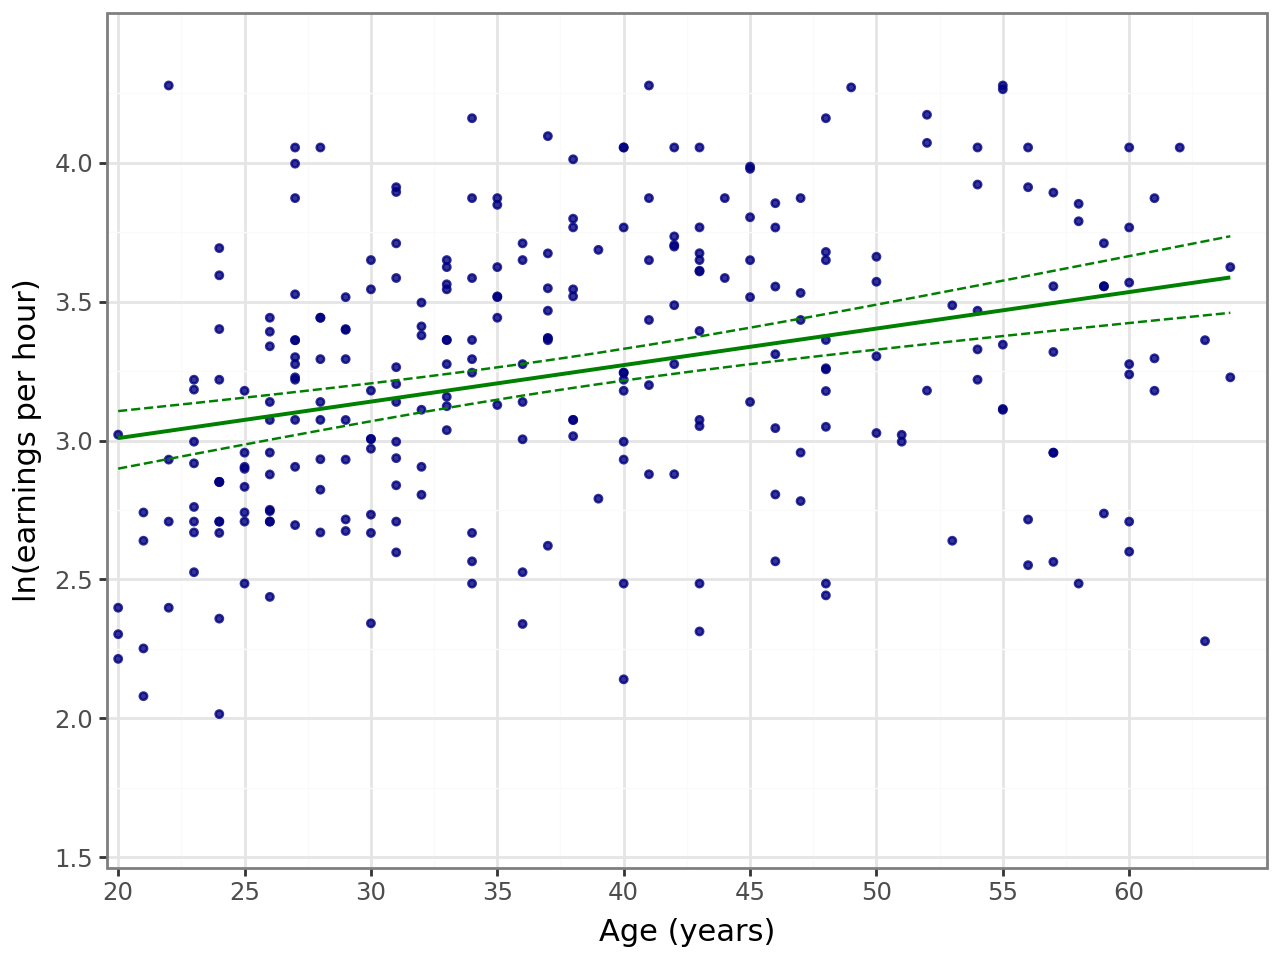

In [33]:
(
    ggplot(
        pred_confidence.loc[lambda x: (x["lnw"] < 4.4) & (x["lnw"] > 2)],
        aes(x="age", y="lnw"),
    )
    + geom_point(color="navy", size=1, alpha=0.8, show_legend=False, na_rm=True)
    + geom_smooth(method="lm", colour="green", se=False, size=0.8, linetype="solid")
    + geom_line(
        pred_confidence,
        aes(x="age", y="lwr"),
        size=0.5,
        linetype="dashed",
        colour="green",
    )
    + geom_line(
        pred_confidence,
        aes(x="age", y="upr"),
        size=0.5,
        linetype="dashed",
        colour="green",
    )
    + coord_cartesian(xlim=(20, 65), ylim=(1.5, 4.5))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(20, 65), breaks=np.arange(20, 65, 5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(1.5, 4.5), breaks=np.arange(1.5, 4.5,0.50)
    )
    + labs(x="Age (years)", y="ln(earnings per hour)")
    + scale_linetype_manual(
        name="",
        values=(1, 1, 2),
        labels=("Lowess", "Confidence interval (95%)", "Confidence interval (95%)"),
    )
    + theme_bw()
)

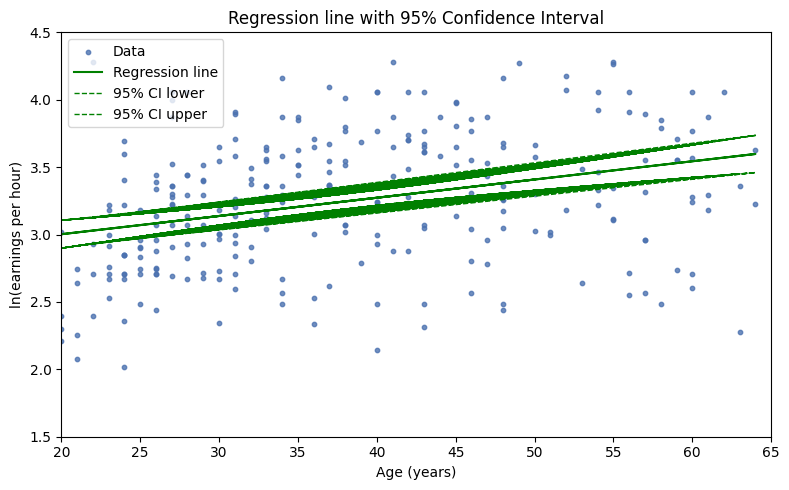

In [37]:
fig, ax = plt.subplots(figsize=(8, 5))

mask = (pred_confidence["lnw"] < 4.4) & (pred_confidence["lnw"] > 2)
ax.scatter(
    pred_confidence.loc[mask, "age"],
    pred_confidence.loc[mask, "lnw"],
    color="#4C72B0",  # replace with color[0] if defined
    s=10,
    alpha=0.8,
    label="Data"
)

# Regression line (fit)
ax.plot(
    pred_confidence["age"],
    pred_confidence["fit"],
    color="green",  # replace with color[1] if defined
    linewidth=1.5,
    label="Regression line"
)

# Confidence interval
ax.plot(
    pred_confidence["age"],
    pred_confidence["lwr"],
    color="green",  # replace with "green" if defined
    linestyle="dashed",
    linewidth=1,
    label="95% CI lower"
)
ax.plot(
    pred_confidence["age"],
    pred_confidence["upr"],
    color="green",  # replace with "green" if defined
    linestyle="dashed",
    linewidth=1,
    label="95% CI upper"
)

ax.set_xlim(20, 65)
ax.set_ylim(1.5, 4.5)
ax.set_xlabel("Age (years)")
ax.set_ylabel("ln(earnings per hour)")
ax.set_title("Regression line with 95% Confidence Interval")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

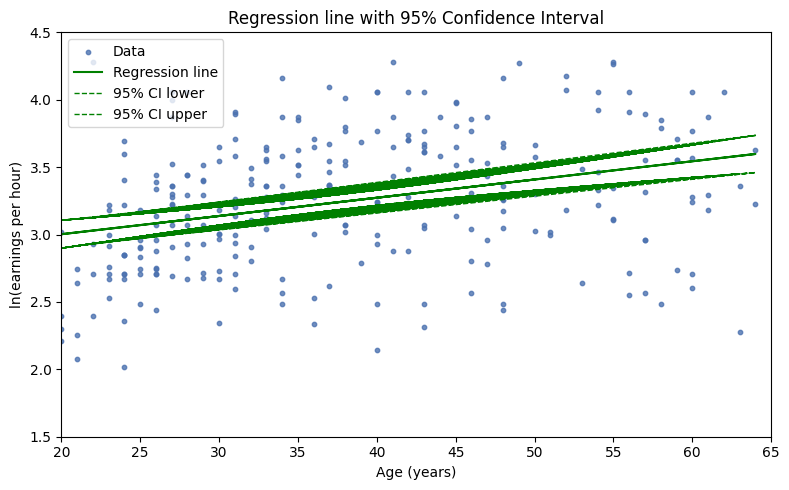

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))

mask = (pred_confidence["lnw"] < 4.4) & (pred_confidence["lnw"] > 2)
ax.scatter(
    pred_confidence.loc[mask, "age"],
    pred_confidence.loc[mask, "lnw"],
    color="#4C72B0",  # replace with color[0] if defined
    s=10,
    alpha=0.8,
    label="Data"
)

# Regression line (fit)
ax.plot(
    pred_confidence["age"],
    pred_confidence["fit"],
    color="green",  # replace with "green" if defined
    linewidth=1.5,
    label="Regression line"
)

# Confidence interval
ax.plot(
    pred_confidence["age"],
    pred_confidence["lwr"],
    color="green",  # replace with "green" if defined
    linestyle="dashed",
    linewidth=1,
    label="95% CI lower"
)
ax.plot(
    pred_confidence["age"],
    pred_confidence["upr"],
    color="green",  # replace with "green" if defined
    linestyle="dashed",
    linewidth=1,
    label="95% CI upper"
)

ax.set_xlim(20, 65)
ax.set_ylim(1.5, 4.5)
ax.set_xlabel("Age (years)")
ax.set_ylabel("ln(earnings per hour)")
ax.set_title("Regression line with 95% Confidence Interval")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

### Prediction Interval

In [40]:
pred_interval = data
pred_interval[["lwr", "upr"]] = (
    reg7.get_prediction().summary_frame().loc[:, ["obs_ci_lower", "obs_ci_upper"]]
)
pred_interval = pred_interval.join(
    reg7.get_prediction().summary_frame()["mean"].rename("fit")
)

pred_interval

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,female,w,lnw,agesq,age_spline_<30,age_spline_30_40,age_spline_>40,lwr,upr,fit
0,2492,92987002078678,January,CA,3242.6000,623.07,40,43,1,NaN,...,False,15.57675,2.745779,676,26,0,0,2.136687,4.030248,3.083468
1,3267,988096835076220,January,CA,3002.4450,2403.84,40,44,4,NaN,...,True,60.09600,4.095943,1369,30,7,0,2.287282,4.177313,3.232297
2,5218,270214071313058,January,DC,290.7775,1615.00,40,43,1,NaN,...,False,40.37500,3.698211,1764,30,10,2,2.354745,4.245150,3.299947
3,7683,108003508029631,January,ID,1048.9474,1057.69,40,43,1,NaN,...,False,26.44225,3.274963,1764,30,10,2,2.354745,4.245150,3.299947
4,9857,260437900039179,January,KY,5660.8471,807.69,40,44,1,NaN,...,True,20.19225,3.005299,900,30,0,0,2.191795,4.083380,3.137588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,308006,410006953901787,December,NC,2922.8039,1350.00,40,44,1,NaN,...,True,33.75000,3.518980,1225,30,5,0,2.260124,4.150351,3.205237
277,311184,115754040190914,December,RI,961.6752,834.00,40,43,1,NaN,...,True,20.85000,3.037354,1089,30,3,0,2.232866,4.123489,3.178177
278,311187,125344040097073,December,RI,848.5656,1576.00,40,43,1,NaN,...,True,39.40000,3.673766,1369,30,7,0,2.287282,4.177313,3.232297
279,311374,900401580410793,December,RI,684.8653,1442.30,50,44,1,NaN,...,False,28.84600,3.361971,2304,30,10,8,2.434884,4.327370,3.381127


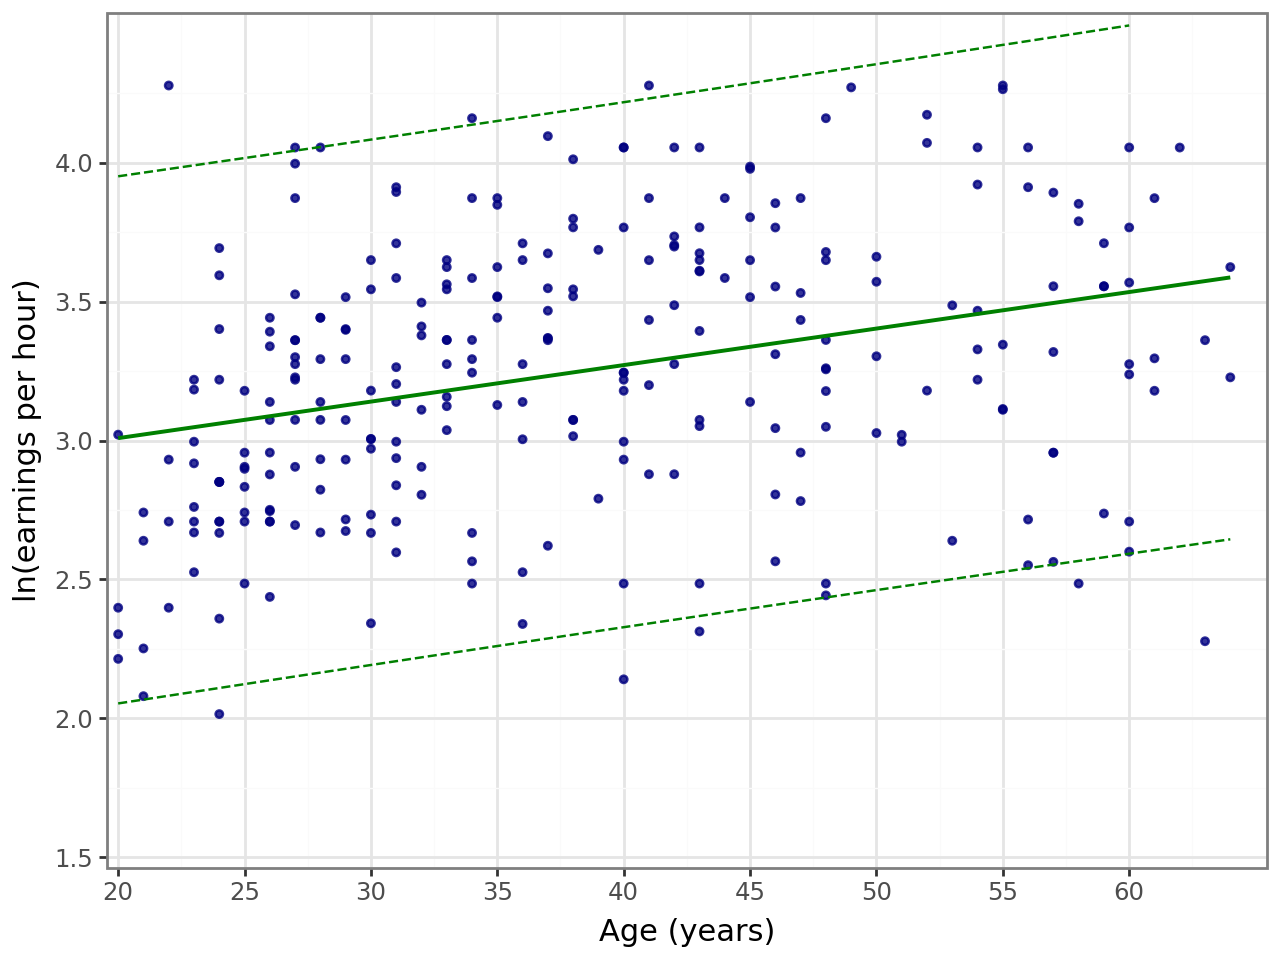

In [41]:
(
    ggplot(
        pred_interval.loc[lambda x: (x["lnw"] < 4.4) & (x["lnw"] > 2)],
        aes(x="age", y="lnw"),
    )
    + geom_point(color="navy", size=1, alpha=0.8, show_legend=False, na_rm=True)
    + geom_smooth(method="lm", colour="green", se=False, size=0.8, linetype="solid")
    + geom_line(
        pred_interval, aes(y="lwr"), size=0.5, linetype="dashed", colour="green"
    )
    + geom_line(
        pred_interval, aes(y="upr"), size=0.5, linetype="dashed", colour="green"
    )
    + coord_cartesian(xlim=(20, 65), ylim=(1.5, 4.5))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(20, 65), breaks=np.arange(20, 65, 5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(1.5, 4.5), breaks=np.arange(1.5, 4.5, 0.50)
    )
    + labs(x="Age (years)", y="ln(earnings per hour)")
    + theme_bw()
)


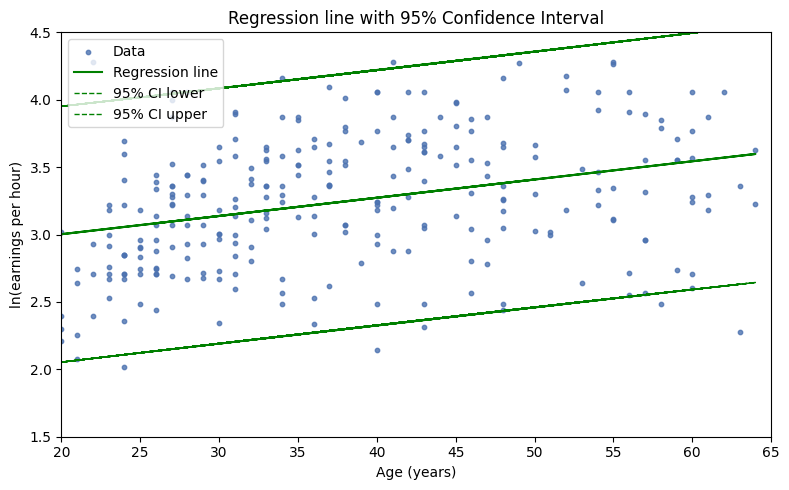

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))

mask = (pred_interval["lnw"] < 4.4) & (pred_interval["lnw"] > 2)
ax.scatter(
    pred_interval.loc[mask, "age"],
    pred_interval.loc[mask, "lnw"],
    color="#4C72B0",  # replace with color[0] if defined
    s=10,
    alpha=0.8,
    label="Data"
)

# Regression line (fit)
ax.plot(
    pred_interval["age"],
    pred_interval["fit"],
    color="green",  # replace with "green" if defined
    linewidth=1.5,
    label="Regression line"
)

# Confidence interval
ax.plot(
    pred_interval["age"],
    pred_interval["lwr"],
    color="green",  # replace with color[1] if defined
    linestyle="dashed",
    linewidth=1,
    label="95% CI lower"
)
ax.plot(
    pred_interval["age"],
    pred_interval["upr"],
    color="green",  # replace with "green" if defined
    linestyle="dashed",
    linewidth=1,
    label="95% CI upper"
)

ax.set_xlim(20, 65)
ax.set_ylim(1.5, 4.5)
ax.set_xlabel("Age (years)")
ax.set_ylabel("ln(earnings per hour)")
ax.set_title("Regression line with 95% Confidence Interval")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

### Figure 9.3 Log hourly wage and age: regressions that capture nonlinearity

(a) Lowess regression and scatterplot

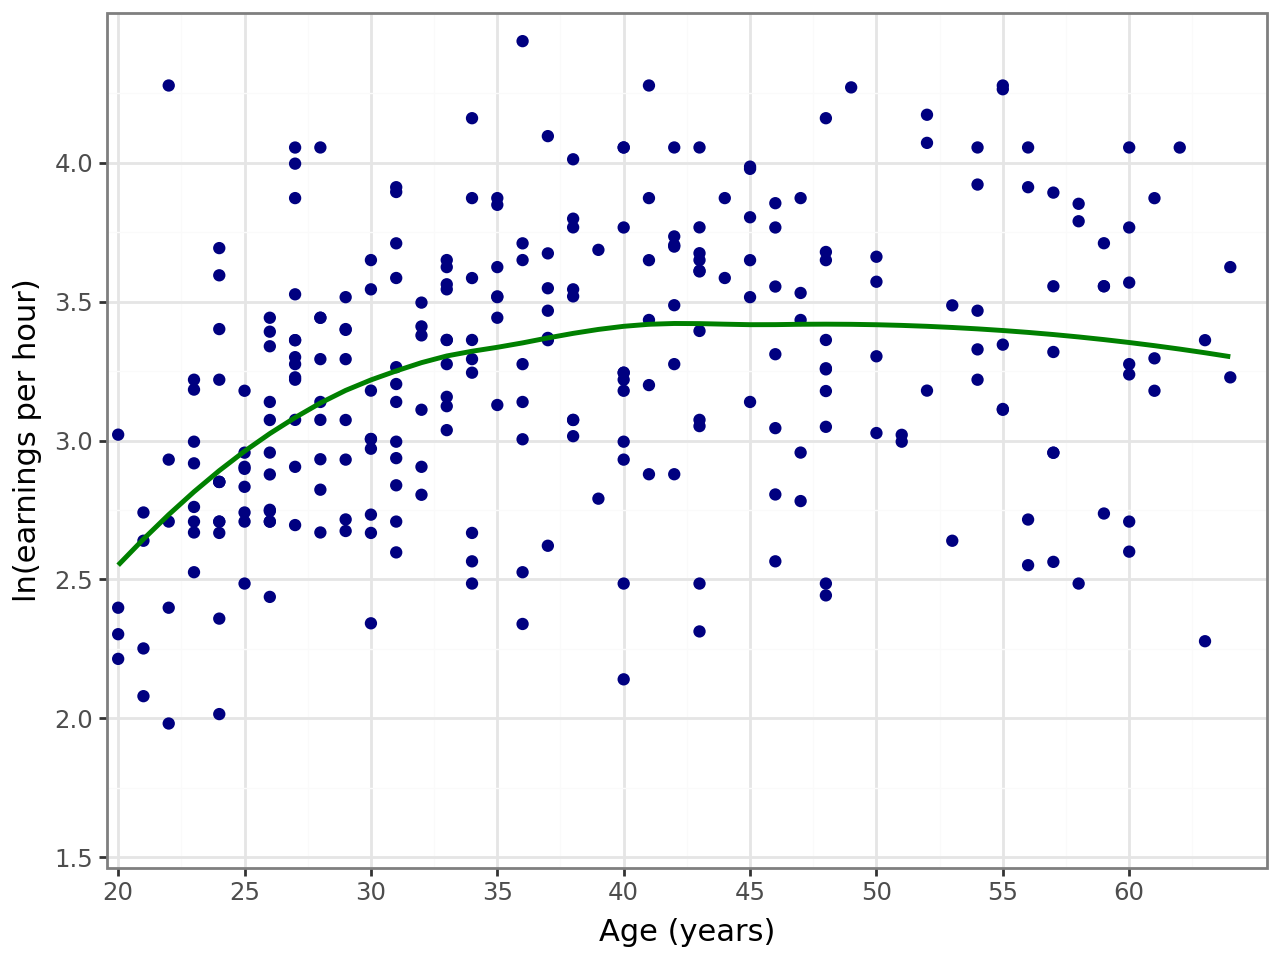

In [ ]:
(
    ggplot(data, aes(x="age", y="lnw"))
    + geom_point(color="navy")
    + geom_smooth(method="loess", color="green", se=False)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(20, 65), breaks=np.arange(20, 65, 5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(1.5, 4.5), breaks=np.arange(1.5, 4.5, 0.50)
    )
    + labs(x="Age (years)", y="ln(earnings per hour)")
    + theme_bw()
)


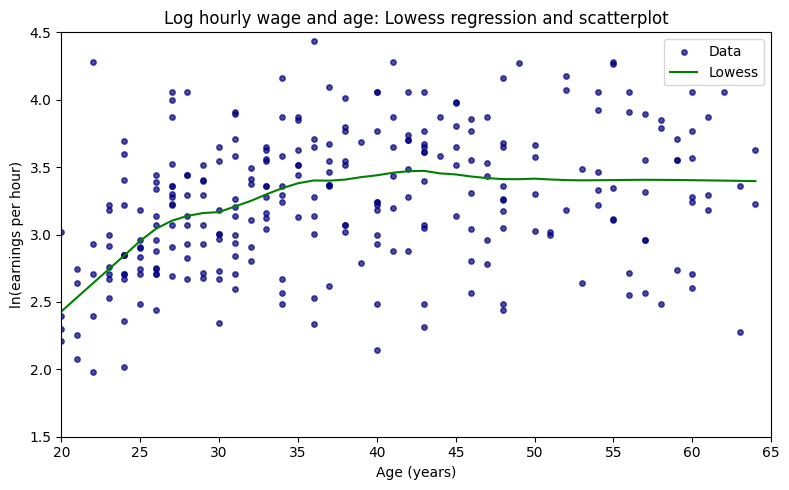

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(data["age"], data["lnw"], color="navy", alpha=0.7, label="Data", s=15)

# Lowess smoothing
lowess_smoothed = lowess(data["lnw"], data["age"], frac=0.3)
ax.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color="green", label="Lowess")

ax.set_xlim(20, 65)
ax.set_ylim(1.5, 4.5)
ax.set_xlabel("Age (years)")
ax.set_ylabel("ln(earnings per hour)")
ax.set_title("Log hourly wage and age: Lowess regression and scatterplot")
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
z = reg4.get_prediction().conf_int()

In [ ]:
res = reg4.get_prediction().summary_frame()
data["lnwpred_ageq"] = res["mean"]
data["lnwpred_ageqCIUP"] = [x[0] for x in z]
data["lnwpred_ageqCILO"] = [x[1] for x in z]

In [ ]:
z = reg5.get_prediction().conf_int()

In [ ]:
res = reg5.get_prediction().summary_frame()
data["lnwpred_agesp"] = res["mean"]
data["lnwpred_agespCIUP"] = [x[0] for x in z]
data["lnwpred_agespCILO"] = [x[1] for x in z]

In [ ]:
data["lnwpred_agel"] = reg6.fit()[0]

(b) Lowess, piecewise linear spline, and quadratic

In [ ]:
plotdata = data.filter(["age", "lnwpred_agel", "lnwpred_ageq", "lnwpred_agesp"]).melt(
    id_vars=["age"]
)

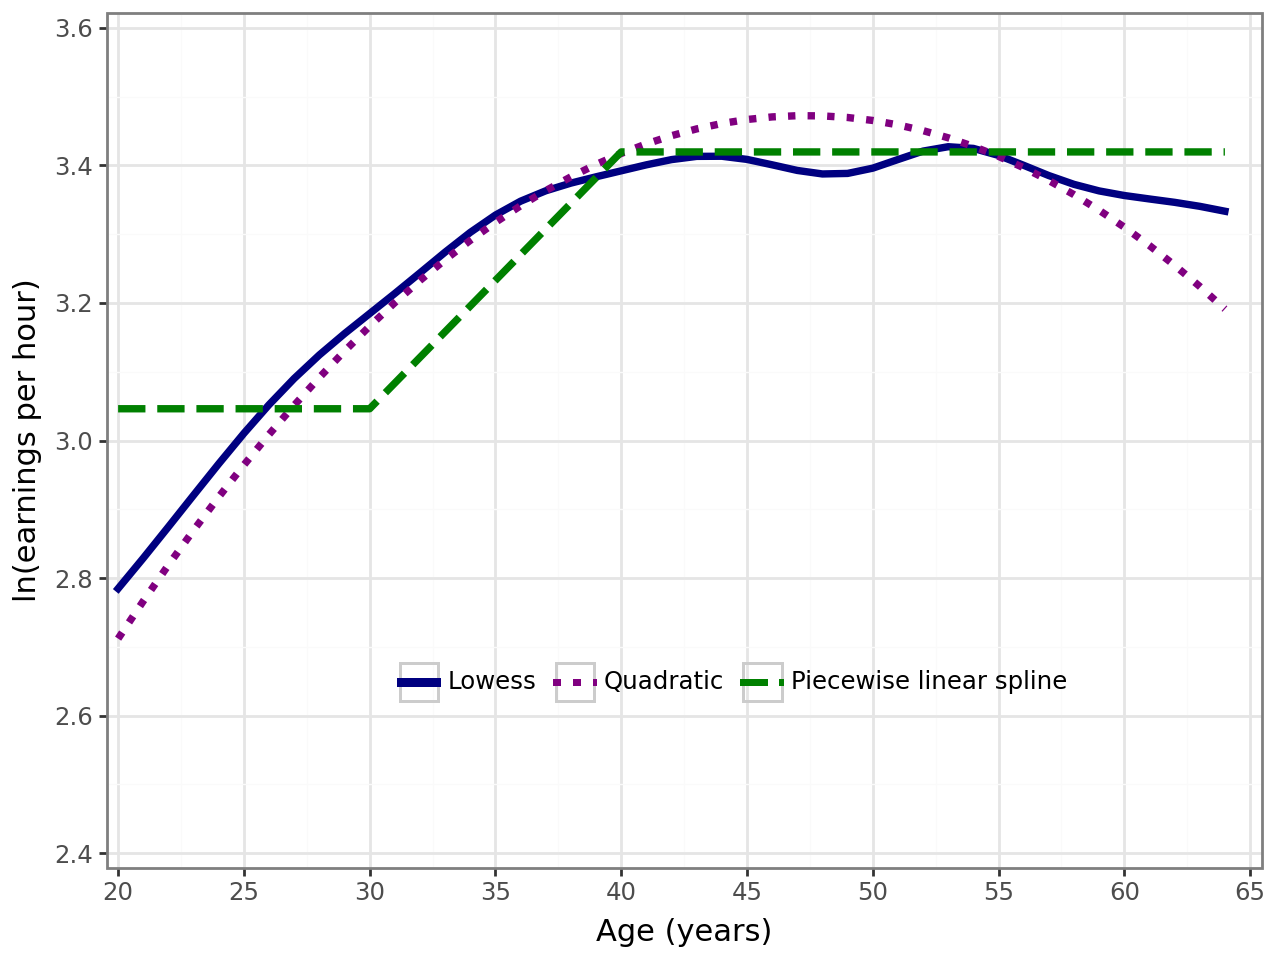

In [ ]:
(
    ggplot(
        plotdata,
        aes(x="age", y="value", color="variable", linetype="variable"),
    )
    + geom_line(size=1.5)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(20, 65), breaks=np.arange(20, 66, 5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.4, 3.6), breaks=np.arange(2.4, 3.6, 0.20)
    )
    + scale_color_manual(
        values=["navy", "purple", "green"],
        labels=["Lowess", "Quadratic", "Piecewise linear spline"],
    )
    + scale_linetype_manual(
        values=["-", ":", "dashed"],
        labels=["Lowess", "Quadratic", "Piecewise linear spline"],
    )
    + labs(x="Age (years)", y="ln(earnings per hour)")
    + theme_bw()
    + theme(
        legend_position=(0.6, 0.2),
        legend_direction="horizontal",
        legend_title=element_blank(),
        legend_background=element_blank(),
    )
)

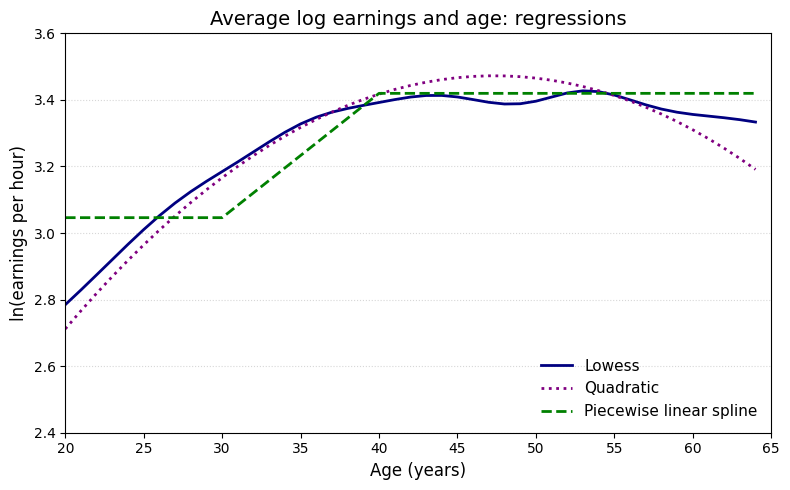

In [ ]:
import matplotlib.pyplot as plt

color_map = {
    "lnwpred_agel": "navy",
    "lnwpred_ageq": "purple",
    "lnwpred_agesp": "green",
}

linestyle_map = {
    "lnwpred_agel": "-",
    "lnwpred_ageq": ":",
    "lnwpred_agesp": "--",
}

plt.figure(figsize=(8, 5))
for var in ["lnwpred_agel", "lnwpred_ageq", "lnwpred_agesp"]:
    subset = plotdata[plotdata["variable"] == var]
    plt.plot(
        subset["age"],
        subset["value"],
        label={"lnwpred_agel": "Lowess", "lnwpred_ageq": "Quadratic", "lnwpred_agesp": "Piecewise linear spline"}[var],
        color=color_map[var],
        linestyle=linestyle_map[var],
        linewidth=1.5,
    )

plt.xlim(20, 65)
plt.ylim(2.4, 3.6)
plt.xlabel("Age (years)")
plt.ylabel("ln(earnings per hour)")
plt.title("Average log earnings and age: regressions")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Figure 9.4 Average log earnings and age: regressions with CI

In [ ]:
plotdata = (
    data.filter(
        [
            "age",
            "lnwpred_agel",
            "lnwpred_ageq",
            "lnwpred_agesp",
            "lnwpred_ageqCIUP",
            "lnwpred_ageqCILO",
            "lnwpred_agespCIUP",
            "lnwpred_agespCILO",
        ]
    )
    .melt(id_vars=["age"])
    .assign(CI=lambda x: x["variable"].str.contains("CI"))
    .assign(
        estimate=lambda x: np.where(x["CI"], x["variable"].str[:-4], x["variable"]),
    )
)

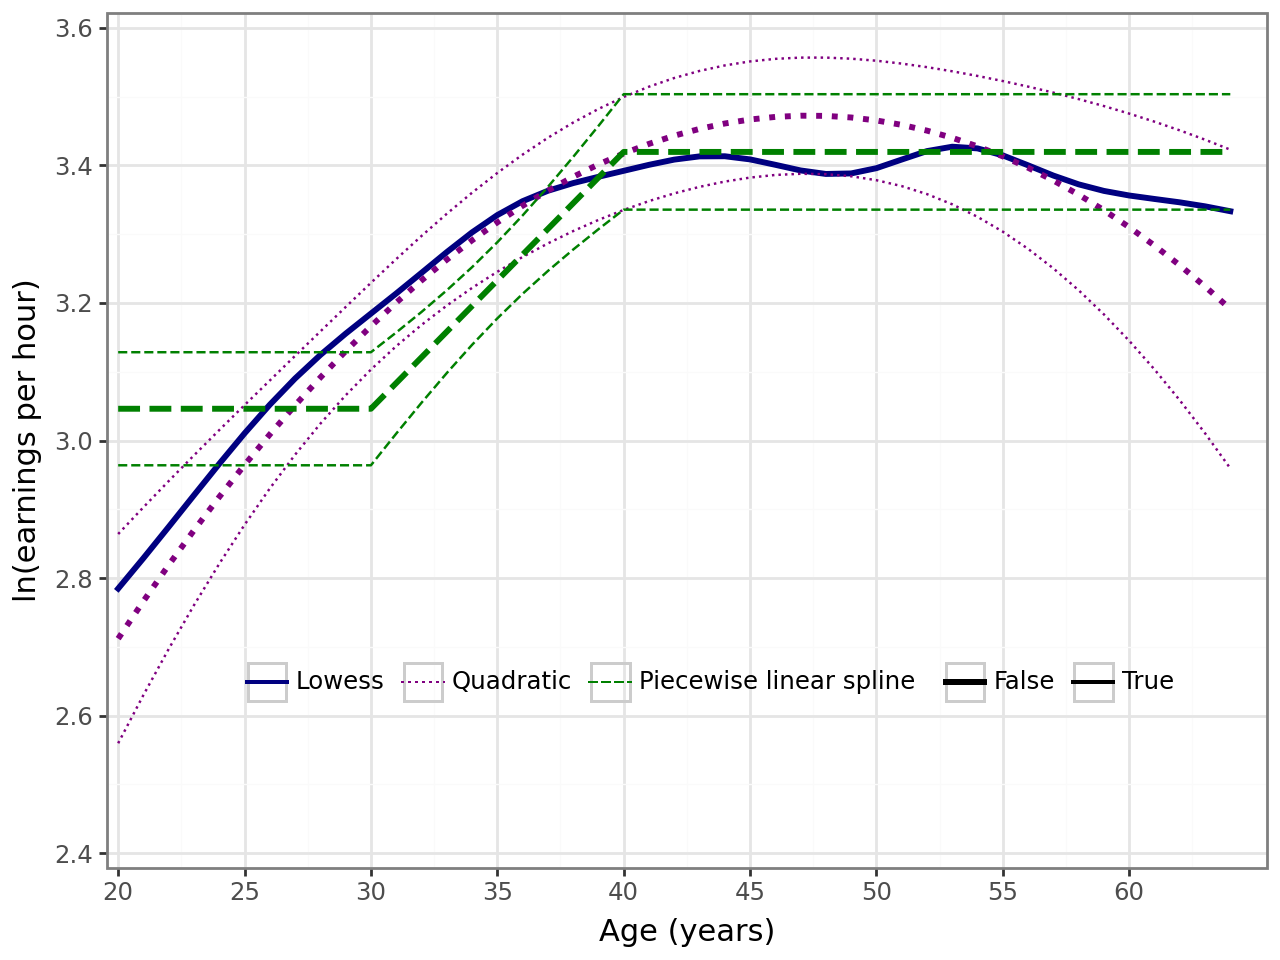

In [ ]:
(
    ggplot(
        plotdata,
        aes(
            x="age",
            y="value",
            group="variable",
            color="estimate",
            linetype="estimate",
            size="CI",
        ),
    )
    + geom_line()
    + coord_cartesian(xlim=(20, 65), ylim=(2.4, 3.6))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(20, 65), breaks=np.arange(20, 65, 5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.4, 3.6), breaks=np.arange(2.4, 3.6, 0.20)
    )
    + labs(x="Age (years)", y="ln(earnings per hour)")
    + scale_color_manual(
        values=["navy", "purple", "green"],
        labels=["Lowess", "Quadratic", "Piecewise linear spline"],
    )
    + scale_linetype_manual(
        values=["-", ":", "dashed"],
        labels=["Lowess", "Quadratic", "Piecewise linear spline"],
    )
    + scale_size_manual(values=[1.2, 0.5])
    + theme_bw()
    + theme(
        legend_position=(0.6, 0.2),
        legend_direction="horizontal",
        legend_title=element_blank(),
        legend_background=element_blank(),
    )
)

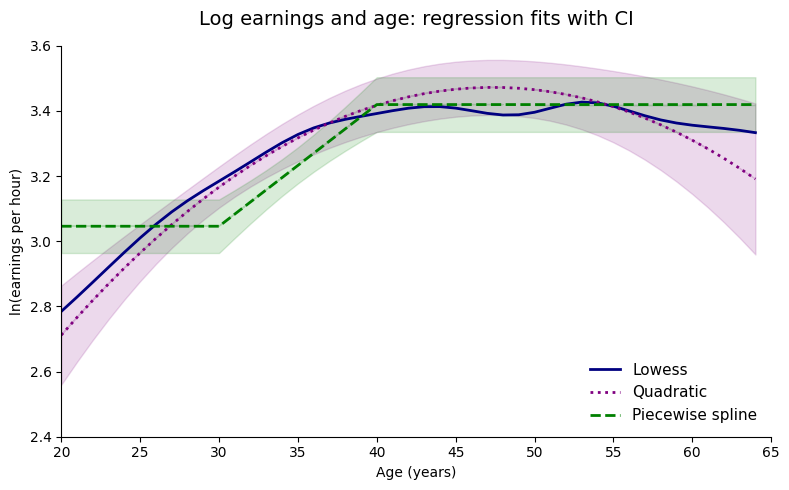

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))

# Sort data by age for smooth lines
sorted_data = data.sort_values("age")

# Plot the three regression lines
sns.lineplot(x="age", y="lnwpred_agel", data=sorted_data, label="Lowess", color="navy", linewidth=2)
sns.lineplot(x="age", y="lnwpred_ageq", data=sorted_data, label="Quadratic", color="purple", linewidth=2, linestyle=":")
sns.lineplot(x="age", y="lnwpred_agesp", data=sorted_data, label="Piecewise spline", color="green", linewidth=2, linestyle="--")

# Confidence intervals for Quadratic
plt.fill_between(
    sorted_data["age"], sorted_data["lnwpred_ageqCIUP"], sorted_data["lnwpred_ageqCILO"],
    color="purple", alpha=0.15, label=None
)
# Confidence intervals for Piecewise spline
plt.fill_between(
    sorted_data["age"], sorted_data["lnwpred_agespCIUP"], sorted_data["lnwpred_agespCILO"],
    color="green", alpha=0.15, label=None
)

plt.xlim(20, 65)
plt.ylim(2.4, 3.6)
plt.xlabel("Age (years)")
plt.ylabel("ln(earnings per hour)")
plt.title("Log earnings and age: regression fits with CI", fontsize=14, pad=15)
plt.legend(loc="lower right", fontsize=11, frameon=False)
sns.despine()
plt.tight_layout()
plt.show()


## Annual Salary Calc

In [ ]:
data["salary"]= data["earnyear"]/1000

In [ ]:
reg_kernel = loess.KernelReg(data["salary"], data["age"], var_type="c", reg_type="lc")
reg_kernel
data["kernel"] = reg6.fit()[0]


reg_quadr= smf.ols(formula="salary~age+agesq", data=data).fit(cov_type="HC1")
quadr_res = reg_quadr.get_prediction().summary_frame()
data["qadr"] = quadr_res["mean"]


reg_spline = smf.ols(formula="salary~age_spline_30_40", data=data).fit(cov_type="HC1")
spline = reg_spline.get_prediction().summary_frame() 
data["spline"] = spline["mean"]

In [ ]:
plotdata2 = data.filter(["age", "kernel", "qadr", "spline"]).melt(
    id_vars=["age"]
)

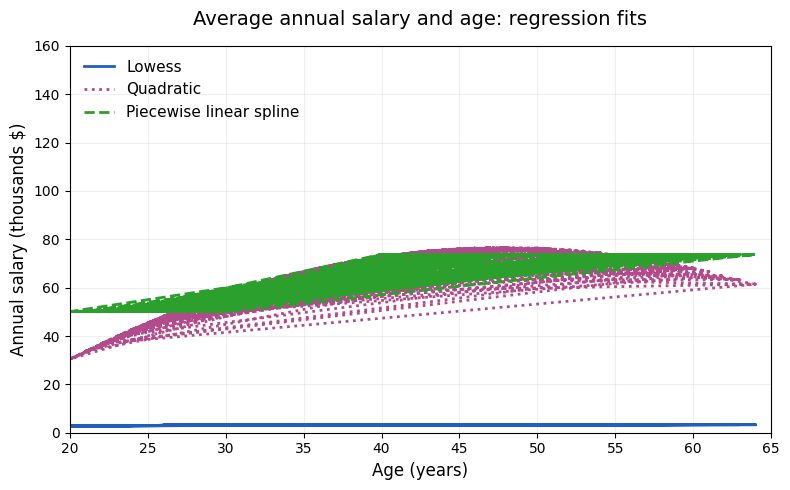

In [ ]:
plt.figure(figsize=(8, 5))

label_map = {
    "kernel": "Lowess",
    "qadr": "Quadratic",
    "spline": "Piecewise linear spline"
}
color_map = {
    "kernel": "#205EC1",
    "qadr": "#B14B8C",
    "spline": "#2CA02C",
}
linestyle_map = {
    "kernel": "-",
    "qadr": ":",
    "spline": "--",
}

for var in ["kernel", "qadr", "spline"]:
    subset = plotdata2[plotdata2["variable"] == var]
    plt.plot(
        subset["age"],
        subset["value"],
        label=label_map[var],
        color=color_map[var],
        linestyle=linestyle_map[var],
        linewidth=2,
    )

plt.xlim(20, 65)
plt.ylim(0, 160)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Annual salary (thousands $)", fontsize=12)
plt.title("Average annual salary and age: regression fits", fontsize=14, pad=15)
plt.legend(loc="upper left", fontsize=11, frameon=False)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

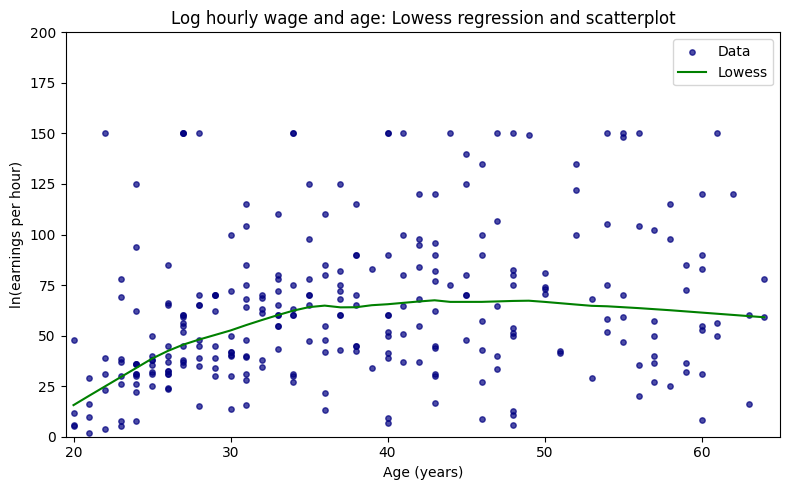

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

fig, ax = plt.subplots(figsize=(8, 5))
salary = data["earnyear"]/1000
ax.scatter(data["age"], salary, color="navy", alpha=0.7, label="Data", s=15)

# Lowess smoothing
lowess_smoothed = lowess(salary, data["age"], frac=0.3)
ax.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color="green", label="Lowess")

ax.set_xlim(19.5, 65)
ax.set_ylim(0, 200)
ax.set_xlabel("Age (years)")
ax.set_ylabel("ln(earnings per hour)")
ax.set_title("Log hourly wage and age: Lowess regression and scatterplot")
ax.legend()
plt.tight_layout()
plt.show()


### Figure 9.1 Bootstrap distribution of the average female–male wage difference among market analysts

In [ ]:
data = pd.read_csv(data_out + "earnings_inference.csv")

In [ ]:
def bs_linreg(x, y, size=1, seed=200999):
    """Perform pairs bootstrap for linear regression."""
    # Set up array of indices to sample from
    inds = np.arange(len(x))

    # Initialize samples
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    rng = np.random.default_rng(seed)
    # Take samples
    for i in range(size):
        bs_inds = rng.choice(inds, len(inds), replace=True)
        bs_x, bs_y = sm.add_constant(x[bs_inds]), y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = (
            sm.regression.linear_model.OLS(bs_y, bs_x).fit().params
        )

    return bs_slope_reps, bs_intercept_reps

In [ ]:
results = bs_linreg(data.lnw.values, data.female.values, size=1000)

b_earnings_female = pd.DataFrame(results).T

b_earnings_female.columns = ["_b_intercept", "_b_female"]


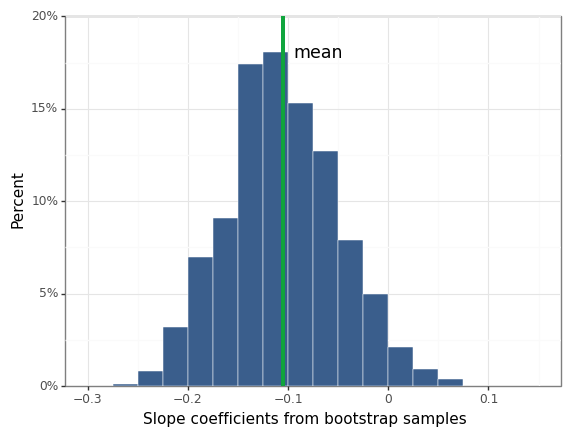

<ggplot: (681296210)>

In [ ]:
(
    ggplot(b_earnings_female, aes(x="_b_female"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        binwidth=0.025,
        center=0.0125,
        closed="left",
        color="white",
        fill="navy",
        size=0.2,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + geom_segment(
        aes(
            x=b_earnings_female["_b_female"].mean(),
            y=0,
            xend=b_earnings_female["_b_female"].mean(),
            yend=0.2,
        ),
        colour=color[1],
        size=1,
    )
    + annotate("text", x=-0.07, y=0.18, label="mean", size=12.5)
    + coord_cartesian(xlim=(-0.3, 0.15), ylim=(0, 0.2))
    + labs(x="Slope coefficients from bootstrap samples", y="Percent")
    + scale_y_continuous(expand=(0.0, 0.0), limits=(0, 0.2), labels=percent_format())
    + theme_bw()
)
